# Data Acquisition & Management - Final Project - Marla Goodman

## Introduction:

Earthquakes are some of the deadliest natural disasters in history. The U.S. Geological Survey (USGS) estimates that 500,000 detectable earthquakes occur in the world each year. 

The measure used to determine an earthquake's intensity and power is magnitude. The famous Richter Scale we have all heard of is actually "an outdated method for measuring magnitude that is no longer used for large, teleseismic earthquakes", according to the USGS. The moment magnitude (Mw) scale is most widely used now. 

More destructive earthquakes typically have magnitudes between 5.5 and 8.9. Scientists expect about 17 larger  earthquakes to occur in any given year. Most earthquakes - 80 to 90 percent - will occur in the belt that is known as the “Ring of Fire”, located around the outer edges of the Pacific Ocean. This means the areas most likely to experience an earthquake (and potential subsequent tsunamis) are Oceania, East Asia,  and West coasts of the Americas.

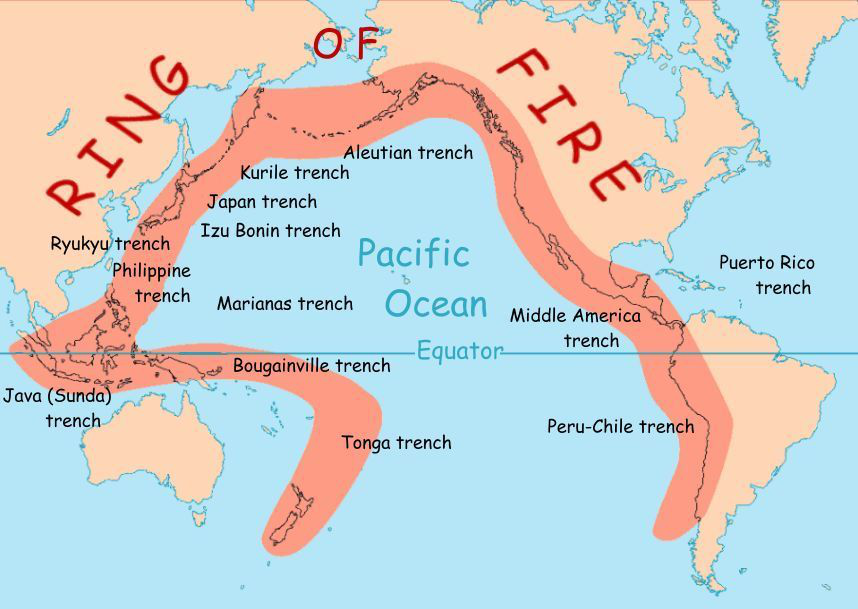

In [1]:
#show image of 'Ring of Fire':
#import url request
import urllib.request
#install pillow
!pip install pillow
#import Image
from PIL import Image
#retrieve pic from url
urllib.request.urlretrieve("https://media.nationalgeographic.org/assets/photos/000/284/28481.jpg", "rof.jpg")
#open image
im = Image.open("rof.jpg")
#show image
im

Given that this ring is prone to earthquakes, which can cause serious tsunamis, the NOAA (National Oceanic and Atmospheric Administration) has developed the DART system (Deep-ocean Assessment & Reporting of Tsunamis) for the early detection, measurement, and real-time reporting of tsunamis within these areas. The NOAA hopes the DART system will help minimize the loss of human life and the monetary damages caused by a natural distaster.

This is a perfect example of why we need to track and analyze natural disasters. Data can give us insights into where and how disasters originate. With that information, we can appropriately focus our modern technology to help prevent damage, death, and injury to communities around the world.

## Research Questions:

1. To assist in earthquake detection, it is important to know which area(s) around the globe receive the most significant or most frequent earthquakes, outside the “Ring of Fire.” This is what I will endeavor to find out. 

I want to determine other large earthquake hotspot(s) around the world. This data would guide companies and governments where to invest the most advanced seismograph technology and resources. Furthermore, in areas most likely to get hit by earthquakes, nations may want to have a humanitarian aid posting present (doctors, nurses, translators, etc.) to assist in common disasters. A last resource that we would want to provide is good building materials so that most of a country's infrastructure will not collapse in the event of an earthquake.


2. Additionally, it is important to see if an earthquake that takes place in or near the water is more often than not accompanied by a tsunami. Is there perhaps a connetion between an earthquake and an ensuing tsunami?

Again, it is important to find out how, when, and where a natural disaster might strike in order to better protect the countries most susceptible to the disaster. 

## Getting And Organizing The Data:

The first data set I will use comes from Chandra Shkehar on Kaggle.com (https://www.kaggle.com/shekpaul/major-earthquakes-noaa?select=NOAA+Earthquaqe+since+1600.csv). 

The NOAA has a database, called the Significant Earthquake Database, that contains information on destructive earthquakes from 2150 BCE to the present. As the full contents of the database is many use cases, Chandra went ahead and filtered the database into a CSV file containing only the uses cases from 1600 CE to now. I am using Shkehar's CSV file, and having already uploaded it to my Github. Now I am bringing it into my notebook.

In [2]:
#import pandas library
import pandas as pd

#read csv file into a dataframe
df1=pd.read_csv('https://raw.githubusercontent.com/MarlaGoodman/AIM-5001/master/NOAA.csv')

#show part of df1
df1.head(2)

Id  Year  Month  Date  Hours  Minutes Tsunami                       Name  \
0   1  1600    2.0  19.0   10.0      NaN     NaN  PERU: VOLCAN HUAYNAPUTINA   
1   2  1600    2.0  28.0   20.0      NaN     NaN                PERU: OMATE   

   Latitude  Longitude  Focal Depth (km)  Magnitude  Deaths  Injuries  \
0     -16.8      -70.9              20.0        7.9     NaN       NaN   
1     -16.6      -70.8              20.0        8.1     NaN       NaN   

   Damage $Mill  
0           NaN  
1           NaN

There are columns I don't need for this project (such as Id, Month, Date, Hours, and Minutes) so I am dropping them.

In [3]:
#drop certain columns from df1
df2=df1.drop(['Id', 'Month','Date','Hours','Minutes','Focal Depth (km)','Latitude','Longitude'], axis=1)

#show part of df2
df2.head(2)

Year Tsunami                       Name  Magnitude  Deaths  Injuries  \
0  1600     NaN  PERU: VOLCAN HUAYNAPUTINA        7.9     NaN       NaN   
1  1600     NaN                PERU: OMATE        8.1     NaN       NaN   

   Damage $Mill  
0           NaN  
1           NaN

According to the NOAA, in their 'Introduction to Catalog of Significant Earthquake', seismology is a relatively young science. In fact, the first modern instruments to measure seismic activity did not appear until the late 1800s. 

The science became more accurate as we approached the 1960s, during which we saw two major advances. The first was the installation of a network of seismological observatories that could detect earthquakes with magnitudes of 4.5 magnitude and above, globally. The second was the computer becoming available in the late 1960s. Computers allowed seismologists to stop relying on inaccurate, clunky graphing methods for locating earthquakes. They also allowed scientists to quickly record and process more of the new network data.

Though removing data is not always advised, it makes sense in this analysis to cut out earthquake instances from before 1960. The data before 1960, while fascinating from a historical perspective, is not accurate or complete enough to answer my research questions.  To show my point, I am getting the ratio of magnitude null values for the years before 1960 and the years after.

In [4]:
#pull out use cases from before 1960
incomplete = df2[0:3028]
#counting the missing values from Magnitude, diving it by number of rows before 1960
incomplete['Magnitude'].isna().sum()/len(incomplete)

0.4223910171730515

More than 40% of magnitudes from before 1960 are missing. 

In [5]:
#selecting the rows that have year of 1960 and on
noaa=df2[3029:5448]
#missing magnitude percentage from years after 1960
noaa['Magnitude'].isnull().sum()/len(noaa)

0.012815212897891691

The null percentage of magnitudes for this later time period, is 1.28% - much better than the 42.23% from before 1960.
This result supports my reasoning to cut the uses cases from before 1960. From this point on, I will make use of this later time period and its uses cases. The data set is called 'noaa'.

In [6]:
#install package
from bs4 import BeautifulSoup
#import BeautifulSoup
import bs4 as bs

#read USGS into notebook via request
usgs=urllib.request.urlopen('https://www.usgs.gov/natural-hazards/earthquake-hazards/science/20-largest-earthquakes-world?qt-science_center_objects=0#qt-science_center_objects').read()

In [7]:
#use beautifulsoup library to organize what was just read in
souped = bs.BeautifulSoup (usgs, 'lxml')

#within 'souped', find every table 
table = souped.find('table')

#within table, find all the rows (marked by a 'tr' tag)
table_rows = table.find_all('tr')

In [8]:
#within every row in table_rows
for tr in table_rows:
    #find all the table data (marked as 'td')
    td = tr.find_all('td')
    #get the text of the data for all the data within td
    v = [data.text for data in td]
    #print the info
    print(v)

[]
['9.5', 'Bio-Bio, Chile', 'Valdivia Earthquake', '1960-05-22', '19:11', '38.14°S', '73.41°W', 'Kanamori & Anderson, 1975']
['9.2', 'Southern Alaska', '1964 Great Alaska Earthquake, Prince William Sound Earthquake, Good Friday Earthquake', '1964-03-28', '03:36', '60.91°N', '147.34°W', 'Kanamori & Anderson, 1975']
['9.1', 'Off the West Coast of Northern Sumatra', 'Sumatra-Andaman Islands Earthquake, 2004 Sumatra Earthquake and Tsunami, Indian Ocean Earthquake', '2004-12-26', '00:58', '3.30°N', '95.98°E', 'Duputel et al., 2012']
['9.1', 'Near the East Coast of Honshu, Japan', 'Tohoku Earthquake', '2011-03-11', '05:46', '38.30°N', '142.37°E', 'Duputel et al., 2012']
['9.0', 'Off the East Coast of the Kamchatka Peninsula, Russia', 'Kamchatka, Russia', '1952-11-04', '16:58', '52.62°N', '159.78°E', 'Kanamori, 1976']
['8.8', 'Offshore Bio-Bio, Chile', 'Maule Earthquake', '2010-02-27', '06:34', '36.12°S', '72.90°W', 'Duputel et al., 2012']
['8.8', 'Near the Coast of Ecuador', '1906 Ecuador–C

One problem I ran into when running my loop through the  data was that I could not make the resulting information into a format appropraite for transforming it into a Pandas DataFrame. After trying the zip() function, re-running the loop in various ways, and other attempts, I finally decided to do move forward manually. I copied and pasted the resulting data, manually put commas in between the lists, and made the data into one data set. This method is by no means a practical solution, and could never work when dealing with hundreds of thousands of values. However, my data set was small enough for this to be a reasonable enough solution to allow me to continue on with my project.

In [9]:
#making info into one set
list=(['9.5', 'Bio-Bio, Chile', 'Valdivia Earthquake', '1960-05-22', '19:11', '38.14°S', '73.41°W', 'Kanamori & Anderson, 1975'],
['9.2', 'Southern Alaska', '1964 Great Alaska Earthquake, Prince William Sound Earthquake, Good Friday Earthquake', '1964-03-28', '03:36', '60.91°N', '147.34°W', 'Kanamori & Anderson, 1975'],
['9.1', 'Off the West Coast of Northern Sumatra', 'Sumatra-Andaman Islands Earthquake, 2004 Sumatra Earthquake and Tsunami, Indian Ocean Earthquake', '2004-12-26', '00:58', '3.30°N', '95.98°E', 'Duputel et al., 2012'],
['9.1', 'Near the East Coast of Honshu, Japan', 'Tohoku Earthquake', '2011-03-11', '05:46', '38.30°N', '142.37°E', 'Duputel et al., 2012'],
['9.0', 'Off the East Coast of the Kamchatka Peninsula, Russia', 'Kamchatka, Russia', '1952-11-04', '16:58', '52.62°N', '159.78°E', 'Kanamori, 1976'],
['8.8', 'Offshore Bio-Bio, Chile', 'Maule Earthquake', '2010-02-27', '06:34', '36.12°S', '72.90°W', 'Duputel et al., 2012'],
['8.8', 'Near the Coast of Ecuador', '1906 Ecuador–Colombia Earthquake', '1906-01-31', '15:36', '0.96°N', '79.37°W', 'Kanamori, 1977'],
['8.7', 'Rat Islands, Aleutian Islands, Alaska', 'Rat Islands Earthquake', '1965-02-04', '05:01', '51.25°N', '178.72°E', 'Kanamori & Anderson, 1975'],
['8.6', 'Eastern Xizang-India border region', 'Assam, Tibet', '1950-08-15', '14:09', '28.36°N', '96.45°E', 'Kanamori, 1977'],
['8.6', 'Off the West Coast of Northern Sumatra', '\xa0', '2012-04-11', '08:39', '2.33°N', '93.06°E', 'Duputel et al., 2012'],
['8.6', 'Northern Sumatra, Indonesia', 'Nias Earthquake', '2005-03-28', '16:10', '2.09°N', '97.11°E', 'NEIC'],
['8.6', 'Andrean of Islands, Aleutian Islands, Alaska', '\xa0', '1957-03-09', '14:23', '51.50°N', '175.63°W', 'Johnson et al., 1994'],
['8.6', 'South of Alaska', 'Unimak Island Earthquake, Alaska', '1946-04-01', '12:29', '53.49°N', '162.83°W', 'Lopez & Okal, 2006'],
['8.5', 'Banda Sea', '\xa0', '1938-02-01', '19:04', '5.05°S', '131.61°E', 'Okal & Reymond, 2003'],
['8.5', 'Atacama, Chile', 'Chile-Argentina Border', '1922-11-11', '04:33', '28.29°S', '69.85°W', 'Kanamori, 1977'],
['8.5', 'Kuril Islands', '\xa0', '1963-10-13', '05:18', '44.87°N', '149.48°E', 'Kanamori & Anderson, 1975'],
['8.4', 'Near the East Coast of Kamchatka Peninsula, Russia', 'Kamchatka, Russia', '1923-02-03', '16:02', '54.49°N', '160.47°E', 'Okal, 1992'],
['8.4', 'Southern Sumatra, Indonesia', '\xa0', '2007-09-12', '11:10', '4.44°S', '101.37°E', 'NEIC'],
['8.4', 'Near the Coast of Southern Peru', 'Arequipa, Peru Earthquake', '2001-06-23', '20:33', '16.27°S', '73.64°W', 'Duputel et al., 2012'],
['8.4', 'Off the East Coast of Honshu, Japan', 'Sanriku, Japan', '1933-03-02', '17:31', '39.21°N', '144.59°E', 'Kanamori, 1971'])

#creating a dataframe out of the one set
information=pd.DataFrame(list)

#show part of dataframe
information.head(2)

0                1                                                  2  \
0  9.5   Bio-Bio, Chile                                Valdivia Earthquake   
1  9.2  Southern Alaska  1964 Great Alaska Earthquake, Prince William S...   

            3      4        5         6                          7  
0  1960-05-22  19:11  38.14°S   73.41°W  Kanamori & Anderson, 1975  
1  1964-03-28  03:36  60.91°N  147.34°W  Kanamori & Anderson, 1975

Now I will clean up the data by giving the columns names, and then taking any irrelevant columns out of the data frame:

In [10]:
#naming columns
information.columns=['Mag','Location','Alternative Name', 'Date','Time','Lat','Long','References']

#show what dataframe is looking like
information.head(2)

Mag         Location                                   Alternative Name  \
0  9.5   Bio-Bio, Chile                                Valdivia Earthquake   
1  9.2  Southern Alaska  1964 Great Alaska Earthquake, Prince William S...   

         Date   Time      Lat      Long                 References  
0  1960-05-22  19:11  38.14°S   73.41°W  Kanamori & Anderson, 1975  
1  1964-03-28  03:36  60.91°N  147.34°W  Kanamori & Anderson, 1975

In [11]:
#dropping irrelevant columns
data=information.drop(['Time','References','Lat','Long','Alternative Name'],axis=1)

I also want to get just the year from the Date column. To do this, I'll first need to change the data in that column from 'object' to 'datetime'. Then I will use a 'datetime' function to extract the year.

In [12]:
#transform data from object to date time
data['Date'] = pd.to_datetime (data['Date'])

In [13]:
#extract year, fill new column with just the year values
data['Year'] = data['Date'].dt.year

#remove Date column
usgs=data.drop(['Date'],axis=1)

#show what dataframe is looking like
usgs.head(2)

Mag         Location  Year
0  9.5   Bio-Bio, Chile  1960
1  9.2  Southern Alaska  1964

Let's take a quick look at this data set and see which years are present:

In [14]:
#sort values by year
usgs.sort_values(by='Year')

Mag                                           Location  Year
6   8.8                          Near the Coast of Ecuador  1906
14  8.5                                     Atacama, Chile  1922
16  8.4  Near the East Coast of Kamchatka Peninsula, Ru...  1923
19  8.4                Off the East Coast of Honshu, Japan  1933
13  8.5                                          Banda Sea  1938
12  8.6                                    South of Alaska  1946
8   8.6                 Eastern Xizang-India border region  1950
4   9.0  Off the East Coast of the Kamchatka Peninsula,...  1952
11  8.6       Andrean of Islands, Aleutian Islands, Alaska  1957
0   9.5                                     Bio-Bio, Chile  1960
15  8.5                                      Kuril Islands  1963
1   9.2                                    Southern Alaska  1964
7   8.7              Rat Islands, Aleutian Islands, Alaska  1965
18  8.4                    Near the Coast of Southern Peru  2001
2   9.1             Off the West Coast of Northern Sumatra  2004
10  8.6                        Northern Sumatra, Indonesia  2005
17  8.4                        Southern Sumatra, Indonesia  2007
5   8.8                            Offshore Bio-Bio, Chile  2010
3   9.1               Near the East Coast of Honshu, Japan  2011
9   8.6             Off the West Coast of Northern Sumatra  2012

Two points from about the USGS data:

1. From this list, it is seen that the largest earthquakes to ever occur during humanity's time on earth only happened within 100 years of eachother, all within the 20th and 21st centuries. It is likely because humans began to capture magnitudes better as the technological revolution advanced our scientific capabilities. This gives further support to my decision for removing pre-1960 earthquakes from the first data set. 

2. Even though this list only covers a span of nearly 100 years, it is useful to analyze. We can determine areas that received the largest earthquakes.

## Exploratory Data Analysis

I will be performing exploratory data analysis on the data variables (columns). First I will run through the variables of the noaa data set. Then I will do the same for the usgs data set.

### NOAA Data Set:

#### Variable 1: Year

The year variable is categorical, but Python thinks it is numerical because years are written as numbers. I will change the year from a numerical type to a categorical type.

In [15]:
#change year type to 'object'
year=noaa['Year'].astype('object')

#get summary statistics on year variable
year.describe()

count     2419
unique      61
top       2004
freq        78
Name: Year, dtype: int64

There are 2419 rows in the year column, spanning 61 years. The most commonly occuring year in the set is 2004, appearing 78 times. 

Now I will graph the variable using matplotlib. 

In [16]:
#bring matplotlib into the notebook
%matplotlib notebook

In [17]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


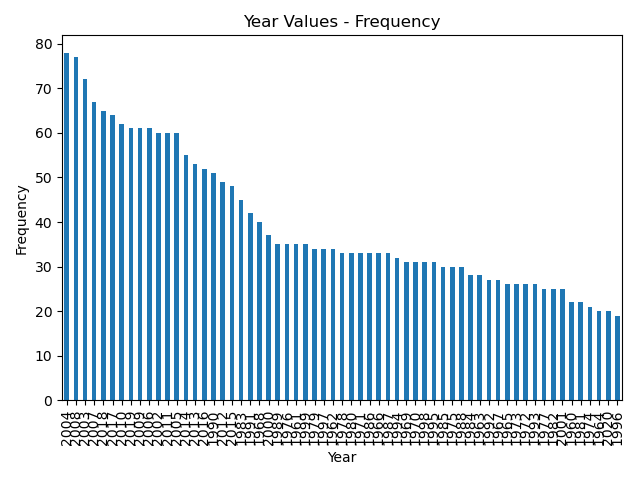

In [18]:
#counting the frequecies
year_cat_plot=(year.value_counts())

#creating a space for the graph
fig=plt.figure(1)
#plot a bar chart, give chart a title
year_cat_plot.plot.bar(title='Year Values - Frequency')
#label x and y axis
plt.xlabel("Year")
plt.ylabel("Frequency")
#rearrange the x ticks
plt.xticks(rotation=90, horizontalalignment="center")
#make chart fit its space
plt.tight_layout()

The graph above is okay, but it's a little crowded, having 61 years shown on it. I think it will be better if I show the year variable by decade. The code I used to do this comes from a comment on a Reddit thread (r/Python) post -https://www.reddit.com/r/Python/comments/71eujm/grouping_a_dataset_by_decade/. 

The commenter was 'xX-DataGuy-Xx', and he used 'namesGrp = names.groupby(["Gender",(names.Year//10x10),"Name"]).sum()) in order to generate a list of the top 10 names by decade, by gender. I adapted this code to group my year cases into decades. He grouped by decade and gender. I am only grouping by year. Further, he used sum() and I am using count().

In [19]:
#grouping year by decade, counting instances in each decade
decades = noaa.groupby(noaa.Year//10*10).count()

<IPython.core.display.Javascript object>


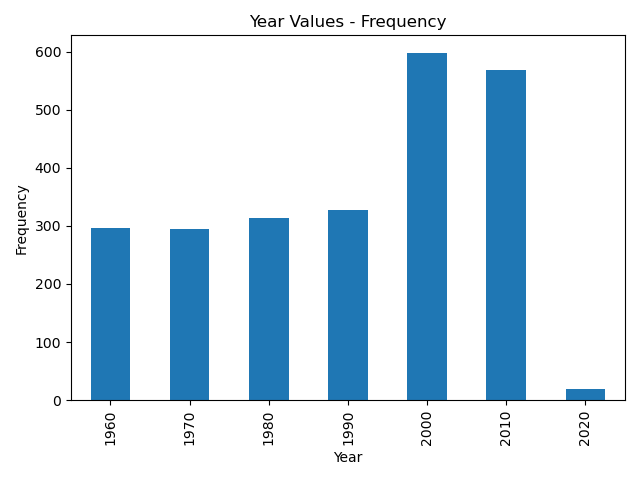

In [20]:
#creating a space for the graph
fig=plt.figure(2)
#getting year data in decade form
decades_plot=(decades['Year'])
#plot a bar chart
#give chart a title
decades_plot.plot.bar(title='Year Values - Frequency')
#label x and y axis
plt.xlabel("Year")
plt.ylabel("Frequency")
#rearrange the x ticks
plt.xticks(rotation=90, horizontalalignment="center")
#make chart fit its space
plt.tight_layout()

The 2000s and the 2010s saw more earthquakes than the 1960s, 1970s, 1980s, or 1990s. The 2020s has the least years because we are only at the start of the 2020s decade. 

#### Variable 2: Tsunami

In [21]:
#generate summary statistics on tsunami variable
noaa['Tsunami'].describe()

count     578
unique      1
top       Yes
freq      578
Name: Tsunami, dtype: object

There are 578 'yes's for the Tsunami variable. 

This means that a tsunami accompanied an earthquake almost 25% of the time. The rest of the time, there is no tsunami:

In [22]:
#tsunami 'yes's out of noaa rows
578/len(noaa)

0.2389417114510128

In [23]:
#tsunami 'NaN's out of noaa rows
noaa['Tsunami'].isna().sum()/len(noaa)

0.7610582885489872

Now I will graph the variable:

<IPython.core.display.Javascript object>


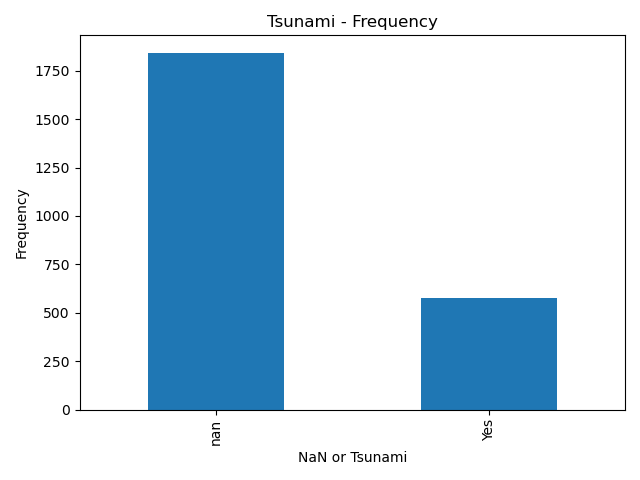

In [24]:
#creating a space for the graph
fig=plt.figure(3)
#counting the frequecies, keeping the nulls
tsun=(noaa['Tsunami'].value_counts(dropna=False))
#plot in a bar chart
#give it a title
tsun.plot.bar(title='Tsunami - Frequency')
#label x and y axis
plt.xlabel("NaN or Tsunami")
plt.ylabel("Frequency")
#rearrange x ticks
plt.xticks(rotation=90, horizontalalignment="center")
#make chart fit its space
plt.tight_layout()

It is seen again, via the chart, that tsunamis did not accompany an earthquake for much of the cases (above 1,750 cases).

#### Variable 3: Name

The Name variable notifies data users of the location of the earthquake. The way the noaa describes the location, generally, is by putting the country's name first, followed by a colon, followed by the province of the country. I just want the country so I am splitting the Name column by the colon. The cases that do not have a colon will not be affected.

In [25]:
#split name column by the colon
location=noaa.Name.str.split(":",expand=True,)

#show results
location.head(2)

0                                           1     2     3
3029  PERU     AREQUIPA,CHUQUIBAMBA,CARAVELI,COTAHUASI  None  None
3030  PERU   LIMA,NAZCA,ICA,HUANCAVELIC,PALPA,HUAITARA  None  None

In [26]:
#get summary statistics for country column only (index 0)
location[0].describe()

count      2419
unique      203
top       CHINA
freq        248
Name: 0, dtype: object

There are 203 unique places in this data set. China has the most appearances (and therefore earthquakes) at 248.

In [27]:
#count frequencies of each place, sorted
loc=location[0].value_counts().sort_values()
loc.head(100)

ANTARCTICA                 1
BOSNIA-HERZEGOVINA         1
ZAMBIA                     1
ARMENIA-AZERBAIJAN-IRAN    1
CZECH REPUBLIC             1
                          ..
ATLANTIC OCEAN             2
GREECE-ALBANIA             2
INDIAN OCEAN               2
YEMEN                      2
IDAHO                      2
Name: 0, Length: 100, dtype: int64

As seen from above, most of these 203 places have few earthquakes.

Therefore, I am going to split my data into fourths:

In [28]:
#putting values into different sets, each with 50 values
quarter1=loc.iloc[0:50]
quarter2=loc.iloc[50:100]
quarter3=loc.iloc[100:150]
quarter4=loc.iloc[150:203]

The first two quarters contain only countries that have experienced 1 or 2 earthquakes. Therefore, I am only graphing quarters 3 and 4.

Quarter 3 graph:

<IPython.core.display.Javascript object>


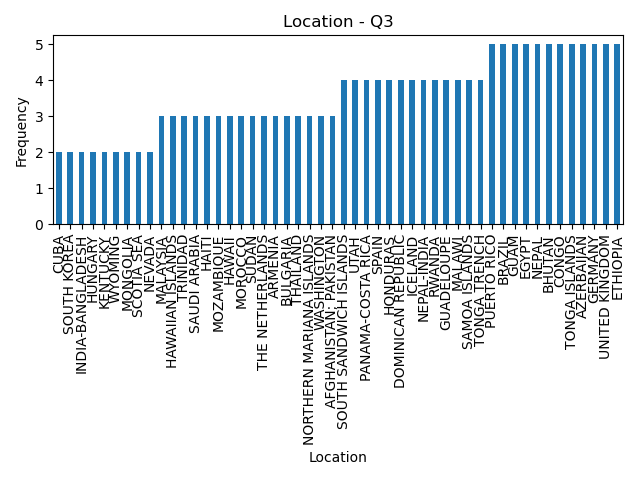

In [29]:
#create a new space for the graph
fig=plt.figure(4)
#plot, title plot
quarter3.plot.bar(title='Location - Q3')
#label axes
plt.xlabel("Location")
plt.ylabel("Frequency")
#arrange graph/ticks
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

The 50 countries/places in quarter 3 have earthquake frequencies of 2 - 5.

Now I will split quarter 4 into two graphs:

<IPython.core.display.Javascript object>


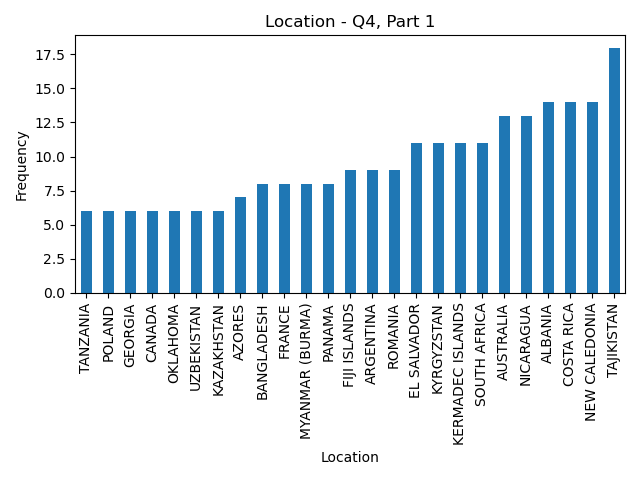

In [30]:
#create a new space for the graph
fig=plt.figure(5)
#plot first 25 values of quarter 4
quarter4.head(25).plot.bar(title='Location - Q4, Part 1')
#label axes, arrange x ticks, fit chart to its space
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

The first half of the fourth quarter shows places having earthquake occurences anywhere from 5 to 18 times. 

Now I will graph the second half:

<IPython.core.display.Javascript object>


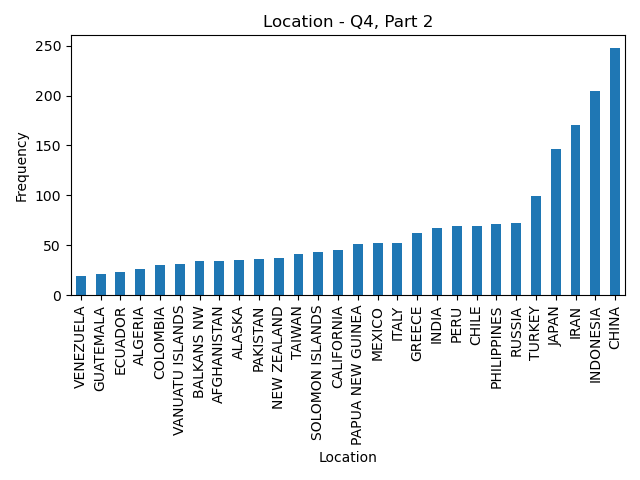

In [31]:
#create a new space for the graph
fig=plt.figure(6)
#plot last values of quarter 4
quarter4.tail(28).plot.bar(title='Location - Q4, Part 2')
#label axes, arrange x ticks, fit chart to space
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

The graph above provides the most places with the most earthquakes. These places have had earthquakes anywhere between approx. 20 and 250 times. Many of these values make sense, given what is known about the 'Ring of Fire'. For example, of the top 10 places with the most earthquakes, there is China, Indonesia, Japan, Philippines, Peru, and Chile - all countries that intersect the 'Ring of Fire'. 

However, Italy, the Balkans region, Greece, Turkey, Iran, Afghanistan, Pakistan, and India are eight places that do not intersect this ring, yet still have a significant number of earthquakes. I will analyze these places later for my research questions.  

#### Variable 4: Magnitude

Similar to the year variable, Python believes the magnitude variable to be numerical, since magnitude is recorded using numbers. However, magnitude is a categorical variable, albeit an ordinal one. We don't have to record earthquake intensities in numbers - we can score them from 'Eh, not so bad' to 'That was a massive earthquake'. The numbers used are meant to represent those scores, making them categorical variables. As such, I will change the variable type accordingly:

In [32]:
#changing magnitude variable type to categorical (object)
magn=noaa['Magnitude'].astype('object')

In [33]:
#generate summary statistics for magnitude variable
magn.describe()

count     2388.0
unique      63.0
top          6.1
freq        98.0
Name: Magnitude, dtype: float64

About 30 magnitudes are not recorded (2,388 are present out of 2,419). Of the 2388 recorded, there are 63 unique magnitude scores. 6.1 is the magnitude the occurs the most, at 98 times.

Now I will graph the variable, splitting the graphs between the 63 unique scores:

<IPython.core.display.Javascript object>


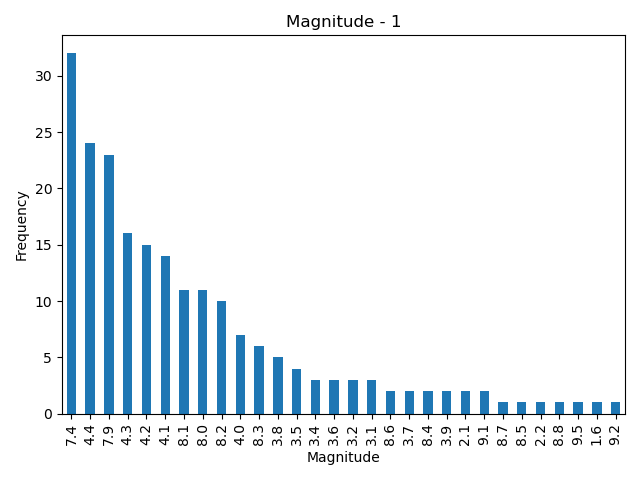

In [34]:
#get frequencies
m_freq=noaa['Magnitude'].value_counts()

#create a new space for the graph
fig=plt.figure(7)
#plotting the bottom half of scores
m_freq.tail(30).plot.bar(title='Magnitude - 1')
#label/arrange chart
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

<IPython.core.display.Javascript object>


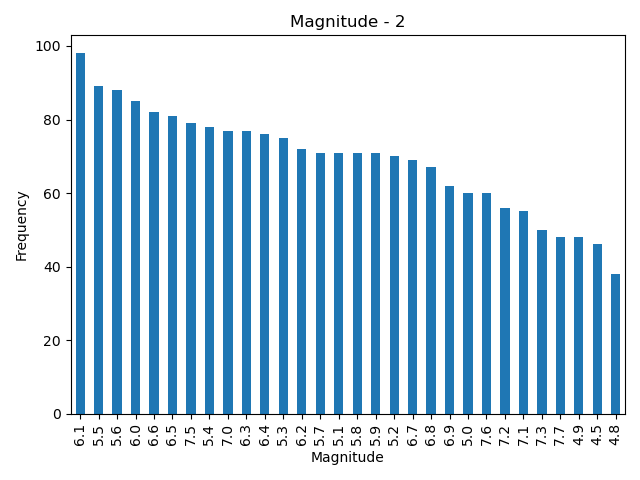

In [35]:
#create a new space for the graph
fig=plt.figure(8)
#plotting the top half
m_freq.head(30).plot.bar(title='Magnitude - 2')
#label/arrange chart
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

The two charts above are fine, but similar to the year variable, I think it would be best to group the magnitude variable by the score. I will use the same code as before to group the variable, except I will use .5 instead of 10.

In [36]:
#group magnitude variable by .5, count
m_groups = noaa.groupby(noaa.Magnitude//.5*.5).count()

#show grouped magnitudes
m_groups['Magnitude']

Magnitude
1.5      1
2.0      3
3.0      9
3.5     16
4.0     76
4.5    203
5.0    354
5.5    390
6.0    408
6.5    361
7.0    270
7.5    248
8.0     40
8.5      5
9.0      3
9.5      1
Name: Magnitude, dtype: int64

<IPython.core.display.Javascript object>


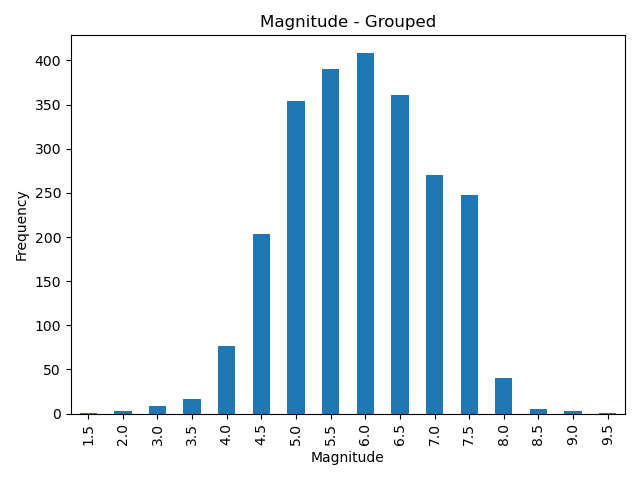

In [37]:
#create a new space for the graph
fig=plt.figure(9)
#plot grouped magnitude
m_groups['Magnitude'].plot.bar(title='Magnitude - Grouped')
#label/arrange the chart
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

From the graph above, it is seen that earthquakes occur the most at around a 6.0 magnitude.

#### Variable 5: Deaths

In [38]:
#generate summary statistics 
noaa['Deaths'].describe()

count      1052.000000
mean       1184.540875
std       13183.795368
min           1.000000
25%           2.000000
50%           5.000000
75%          29.000000
max      316000.000000
Name: Deaths, dtype: float64

The describe() function ignores any nulls in the data, meaning there are 1,052 cases where people passed away. The mean of deaths is 1,184. The spread starts at 1 person and ends at 316,000 people passing. 

Because the describe function ignores the null values, I will drop the NaNs from the variable in order to plot the graph:

In [39]:
#drop NaN from variable
deaths=noaa['Deaths'].dropna()

Now I will graph the variable in a histogram and a boxplot:

<IPython.core.display.Javascript object>


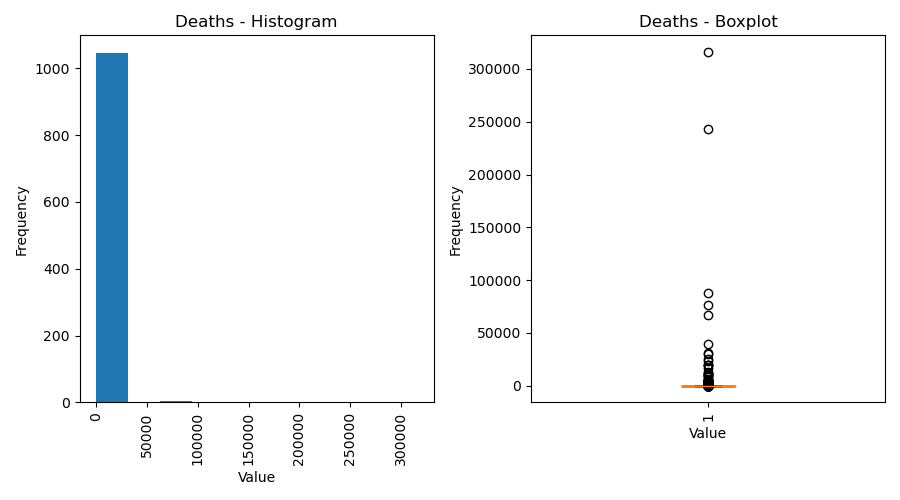

In [40]:
#create a new space for the graph, give it a size
fig=plt.figure(figsize=(9,5))
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram, label/arrange chart
plt.hist(deaths)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Deaths - Histogram')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot, label/arrange chart
plt.boxplot(deaths)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Deaths - Boxplot')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()


The data is incredibly skewed right. In many instances, fewer than 50,000 people passed. In fact, it's much less than 50,000 per case. Out of 1,052 cases, 900 cases have 100 or less deaths:

In [41]:
#view first 900 values of deaths variable
deaths.sort_values().head(900)

3725      1.0
3783      1.0
5020      1.0
3776      1.0
3773      1.0
        ...  
3240     97.0
5282     98.0
3231     98.0
3364    100.0
3406    100.0
Name: Deaths, Length: 900, dtype: float64

I will now look at the last 20 values, to view the cases with the largest amount of deaths:

<IPython.core.display.Javascript object>


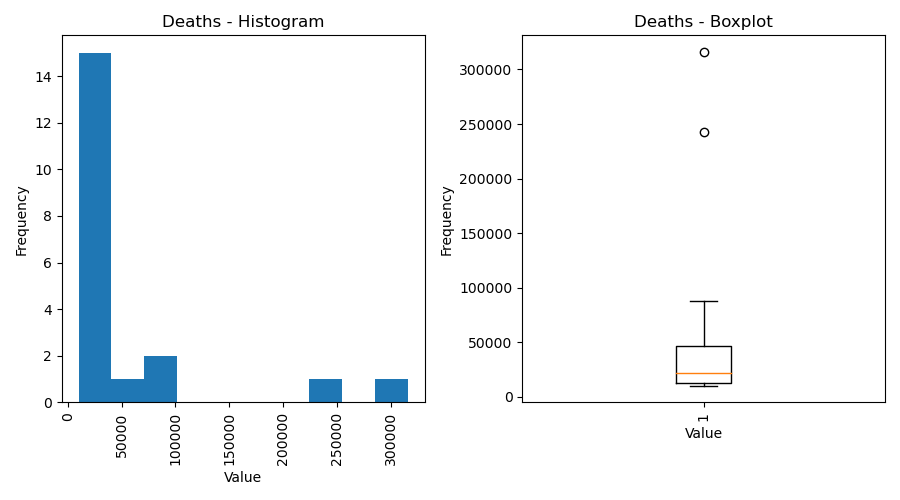

In [42]:
#create a new space for the graph, give it a size
fig=plt.figure(figsize=(9,5))
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram of the last 20 values
plt.hist(deaths.sort_values().tail(20))
#plot/labe/arrange/fit the graph
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Deaths - Histogram')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot of the last 20 variables
plt.boxplot(deaths.sort_values().tail(20))
#plot/labe/arrange/fit the graph
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Deaths - Boxplot')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

In graphing the larger cases of deaths, two major outliers can be seen more clearly - one at nearly 250,000 deaths and another at nearly 300,000 deaths. Otherwise, the majority of the cases for the last 20 values lay at 100,000 deaths or below.

#### Variables  6 & 7: Injuries & Damages (in the millions of U.S. dollars)

Now I will organize and analyze the injuries and damages variables the same way as I did for the deaths variable.

In [43]:
#generate summary statistics for injuries variable
noaa['Injuries'].describe()

count      1075.000000
mean       2367.334884
std       28213.653334
min           1.000000
25%           9.000000
50%          36.000000
75%         200.000000
max      799000.000000
Name: Injuries, dtype: float64

1,075 out of 2,419 cases had injuries. The average number of people injured was 2,367. There was a large spread with 1 being the smallest amount of injured people, to 799,000 being the largest amount of injured people.

In [44]:
#drop null values from the variable
injuries=noaa['Injuries'].dropna()

<IPython.core.display.Javascript object>


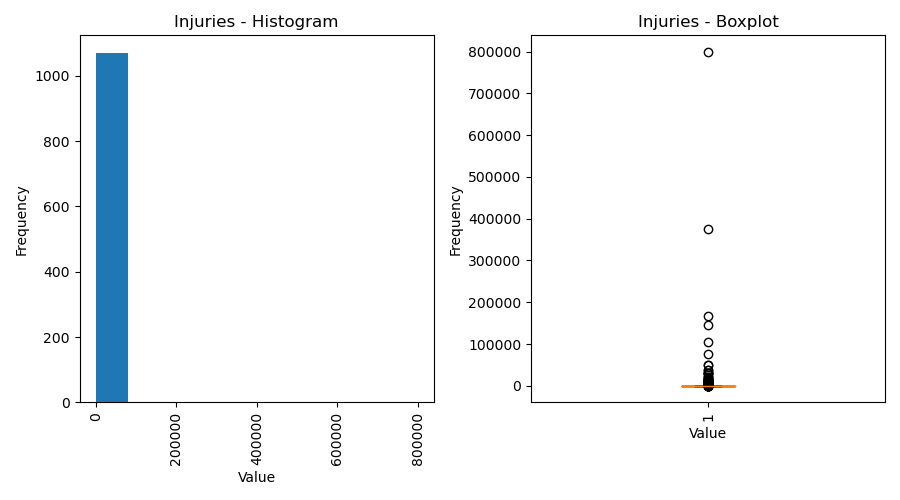

In [45]:
#create a new space for the graph
fig=plt.figure(figsize=(9,5))
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram of injuries
plt.hist(injuries)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Injuries - Histogram')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot of injuries
plt.boxplot(injuries)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Injuries - Boxplot')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

Now I am graphing the last 20 values of injuries so I can see those larger data points better:

<IPython.core.display.Javascript object>


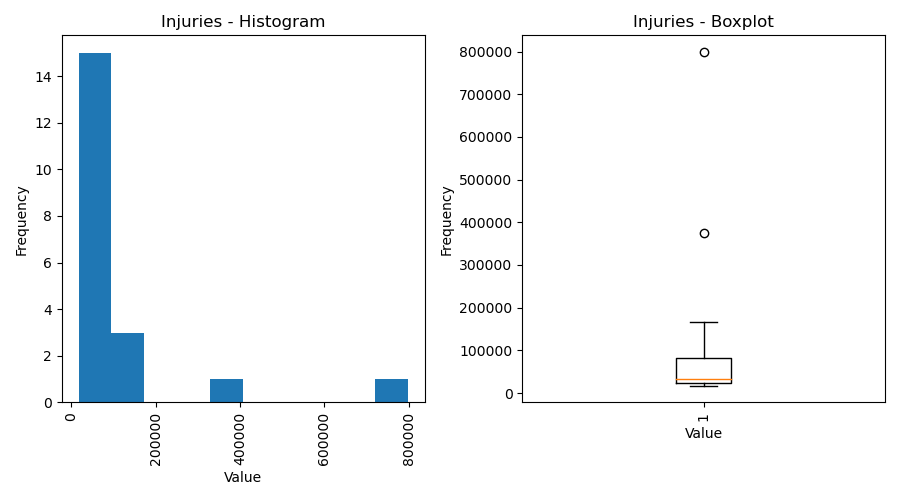

In [46]:
#create a new space for the graph
fig=plt.figure(figsize=(9,5))
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram of last 20 injury values
plt.hist(injuries.sort_values().tail(20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Injuries - Histogram')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot of last 20 injury values
plt.boxplot(injuries.sort_values().tail(20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Injuries - Boxplot')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()


Here I can see the two largest outliers the best - one with around 400,000 injured people and one with around 800,000 injured people. The data is also skewed right for this variable. 

In [47]:
#generate summary statistics for damages variable
noaa['Damage $Mill'].describe()

count       437.000000
mean       1453.664675
std        7263.267922
min           0.100000
25%           5.000000
50%          28.400000
75%         285.500000
max      100000.000000
Name: Damage $Mill, dtype: float64

Of 2,419 cases, only 437 cases report damages nearing or at the millions of dollars mark. The mean is 1,453 million dollars. The least amount of damage is 100,000 dollars, while the most is 100,000 million dollars. 

In [48]:
#drop null values from variable
damages=noaa['Damage $Mill'].dropna()

<IPython.core.display.Javascript object>


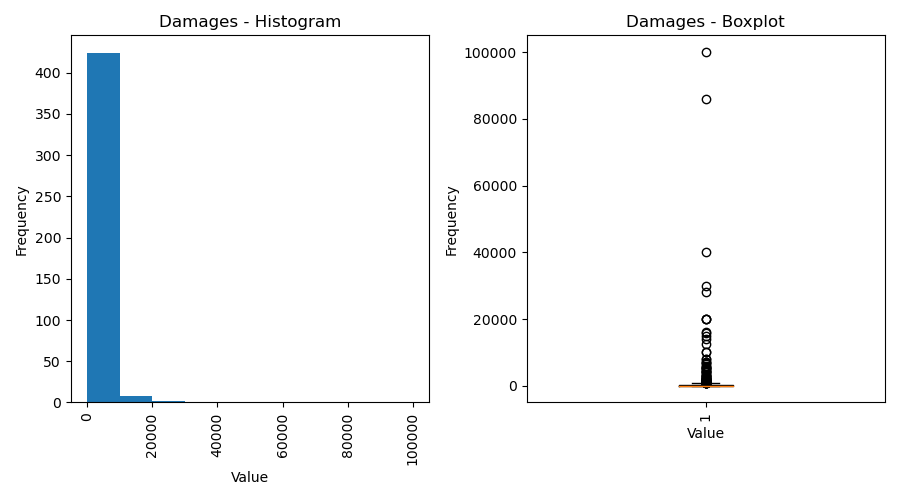

In [49]:
#create a new space for the graph
fig=plt.figure(figsize=(9,5))
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram of damages
plt.hist(damages)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Damages - Histogram')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot of damages
plt.boxplot(damages)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Damages - Boxplot')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

Many damage cases lay below or near 20,000 million dollars. There are outliers, and the data is skewed right.

Now I am graphing the last 20 values of damages so I can see those larger data points better:

<IPython.core.display.Javascript object>


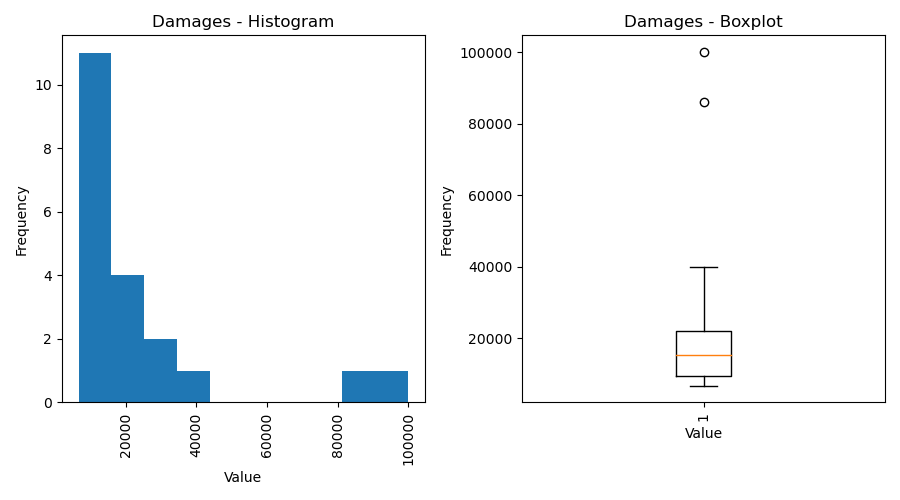

In [50]:
#create a new space for the graph
fig=plt.figure(figsize=(9,5))
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram of last 20 damages values
plt.hist(damages.sort_values().tail(20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Damages - Histogram')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot of 'last 20 damages values
plt.boxplot(damages.sort_values().tail(20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Damages - Boxplot')
plt.xticks(rotation=90, horizontalalignment="center")
plt.tight_layout()

The two major outliers have damages between or at 80,000 million dollars and 100,000 million. The data is skewed right. Many damage cases for these 20 values fall below 40,000 million dollars worth of damages.

### USGS Data Set:

#### Variable 1: Magnitude

In [51]:
#generate summary statistics for magnitude
usgs['Mag'].describe()

count      20
unique      9
top       8.6
freq        5
Name: Mag, dtype: object

There are 9 different magnitude scores present. The most frequent is a score of 8.6. It appears five times in this set. I will not graph this variable.

<IPython.core.display.Javascript object>


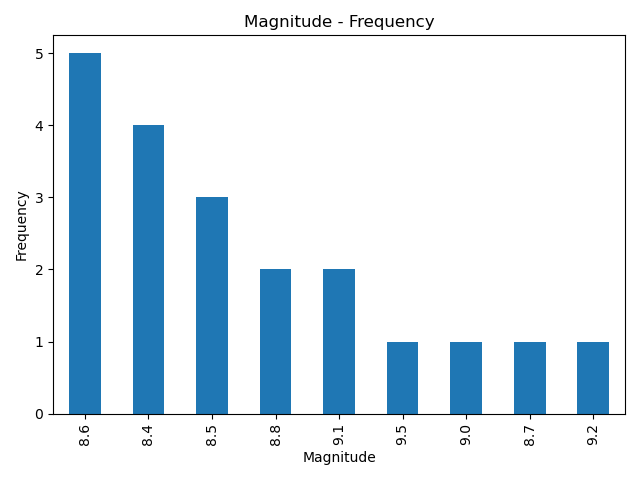

In [52]:
#creating a space for the graph
fig=plt.figure(16)
#counting the frequecies
mag=(usgs['Mag'].value_counts())
#plot in a bar chart
#give it a title
mag.plot.bar(title='Magnitude - Frequency')
#label x and y axis
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
#rearrange x ticks
plt.xticks(rotation=90, horizontalalignment="center")
#make chart fit its space
plt.tight_layout()

Above is confirmation that a magnitude of 8.6 appears the most out of this data set. Scores around 8.6 (8.4,8.5) occur the second most. The scores at and above 9.0 happened less frequently, with the exeption of 8.7 having the same frequency as some of the 9.0 scores. 

#### Variable 2: Location

The way the usgs presents the location of the earthquake is by naming the area of the country, followed by a comma, followed by a country. Here, I did a quick run through of the 20 locations and determined what certain locations should be shortened to. 

In [53]:
#replacing location with a country if it has a certain word in it 
usgs["Location"][usgs['Location'].str.contains("Chile")] = "Chile"
usgs["Location"][usgs['Location'].str.contains("Alaska")] = "Alaska"
usgs["Location"][usgs['Location'].str.contains("Sumatra")] = "Indonesia"
usgs["Location"][usgs['Location'].str.contains("Japan")] = "Japan"
usgs["Location"][usgs['Location'].str.contains("Russia")] = "Russia"
usgs["Location"][usgs['Location'].str.contains("Ecuador")] = "Ecuador"
usgs["Location"][usgs['Location'].str.contains("India")] = "India"
usgs["Location"][usgs['Location'].str.contains("Indonesia")] = "Indonesia"
usgs["Location"][usgs['Location'].str.contains("Kuril")] = "Russia"
usgs["Location"][usgs['Location'].str.contains("Peru")] = "Peru"

<ipython-input-53-841d85c3c044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs["Location"][usgs['Location'].str.contains("Chile")] = "Chile"
<ipython-input-53-841d85c3c044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs["Location"][usgs['Location'].str.contains("Alaska")] = "Alaska"
<ipython-input-53-841d85c3c044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs["Location"][usgs['Location'].str.contains("Sumatra")] =

In [54]:
#generate summary statistics for location
usgs['Location'].describe()

count            20
unique            9
top       Indonesia
freq              4
Name: Location, dtype: object

There are 9 unique places.

I will now graph the variable.

<IPython.core.display.Javascript object>


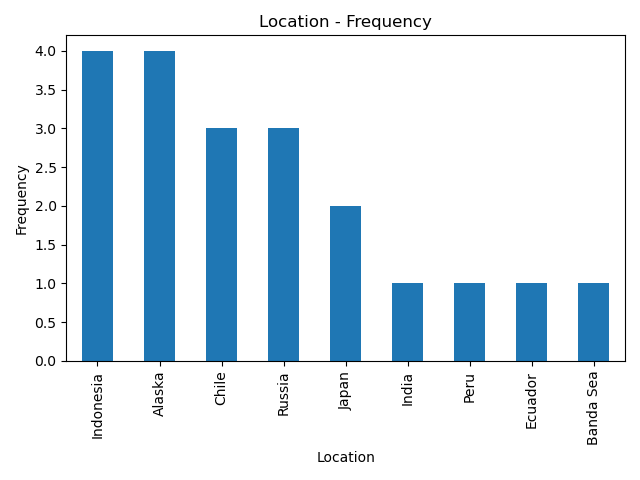

In [55]:
#creating a space for the graph
fig=plt.figure(17)
#counting the frequecies
locs=(usgs['Location'].value_counts())
#plot in a bar chart
#give it a title
locs.plot.bar(title='Location - Frequency')
#label x and y axis
plt.xlabel("Location")
plt.ylabel("Frequency")
#rearrange x ticks
plt.xticks(rotation=90, horizontalalignment="center")
#make chart fit its space
plt.tight_layout()

Indonesia and Alaska appear the most at four times. Chile and Russia follow at three times each. Then comes Japan at two times. Finally, Ecuador, India, Peru, and the Banda Sea (which is right next to Indonesia) appear one time each.

#### Variable 3: Year

In [56]:
#change data type from numerical variable to categorical
year_usgs=usgs['Year'].astype('object')

#generate summary statistics for year
year_usgs.describe()

count       20
unique      20
top       1950
freq         1
Name: Year, dtype: int64

There are 20 different year in this set, meaning no year is repeated twice.  

I will now graph this variable, which will show all 20 years with a frequency of 1.

<IPython.core.display.Javascript object>


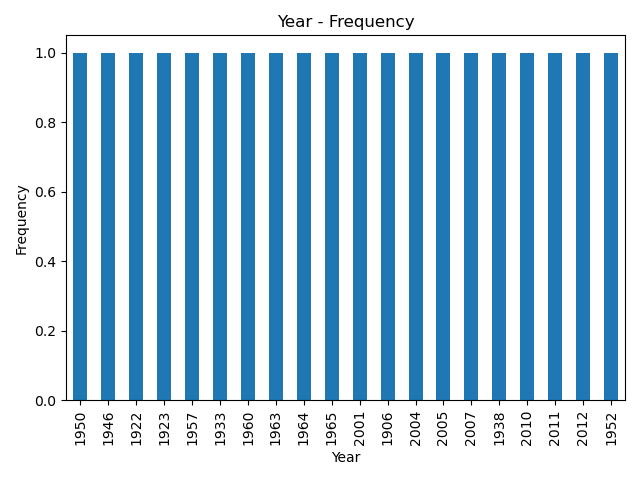

In [57]:
#creating a space for the graph
fig=plt.figure(18)
#counting the frequecies
y=(usgs['Year'].value_counts())
#plot in a bar chart
#give it a title
y.plot.bar(title='Year - Frequency')
#label x and y axis
plt.xlabel("Year")
plt.ylabel("Frequency")
#rearrange x ticks
plt.xticks(rotation=90, horizontalalignment="center")
#make chart fit its space
plt.tight_layout()

From the above summary statistics and graph, it can be seen that every year in this data set appears just one time.

## Performing Analysis Work For Research Questions 

### Question 1:

The first research question involves discovering which area(s) around the globe receive the most significant and/or frequent earthquakes, outside the “Ring of Fire.” Determining other large earthquake hotspots around the world will guide companies and governments on where to invest their most advanced seismograph technology and resources. 

First I will look at the usgs data, creating a graph that plots the location and the magnitude against eachother, and gives us the frequency as well. 

<IPython.core.display.Javascript object>


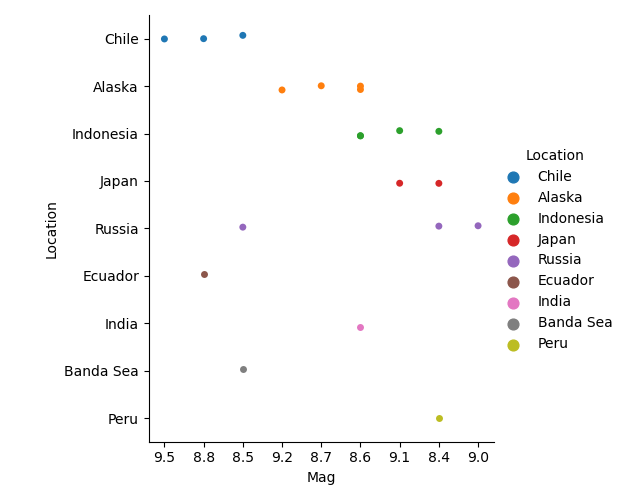

In [58]:
#import seaborn
import seaborn as sns

#graph catplot
sns.catplot(x='Mag',y='Location',hue='Location',data=usgs)

Chile, Alaska, Indonesia, Japan, Russia, Ecuador, Peru, and the Banda Sea (the sea right next to Indonesia) are all places that intersect the 'Ring of Fire', so it makes sense why they would get larger earthquakes. However, since I am trying to determine other earthquake hotspots than the ring, the only value relevant to me is India. 

Unfortunately, the usgs data set does not provide sufficient data to indicate whether or not the Indian subcontinent is more prone to larger or more frequent earthquakes than usual. Here, India only appears once, its magnitude not reaching past an 8.6. 

I will now look at the NOAA data, at the places with the most frequent earthquakes (labelled as quarter 4 in the EDA).

In [59]:
#look at places with over 30 earthquakes
quarter4.tail(24)

COLOMBIA             30
VANUATU ISLANDS      31
BALKANS NW           34
AFGHANISTAN          34
ALASKA               35
PAKISTAN             36
NEW ZEALAND          37
TAIWAN               41
SOLOMON ISLANDS      43
CALIFORNIA           45
PAPUA NEW GUINEA     51
MEXICO               52
ITALY                52
GREECE               62
INDIA                67
PERU                 69
CHILE                69
PHILIPPINES          71
RUSSIA               72
TURKEY               99
JAPAN               146
IRAN                171
INDONESIA           205
CHINA               248
Name: 0, dtype: int64

In the EDA, I mentioned I would specifically be looking the eight places that had many earthquakes, but were not located by the 'Ring of Fire'. Of the approx. 25 places with the most earthquakes, only Afghanistan, the Balkans, Pakistan, Italy, Greece, India, Turkey, and Iran do not intersect with the 'Ring of Fire'. Yet, they have had more earthquakes than what other places typically see.  

Looking at these eight places on a map, a line starts to form. The line starts from the lower eastern part of Europe where Itlay, Greece, and the Balkans are located. Right near Greece and the Balkans is Turkey, where the line continues. After Turkey, the line continues into Iran, Afghanistan, Pakistan, and finally India. 

With the image below, if you start at Italy, and make your way to India through the regions mentioned, you'll get a   more or less diagonal line.

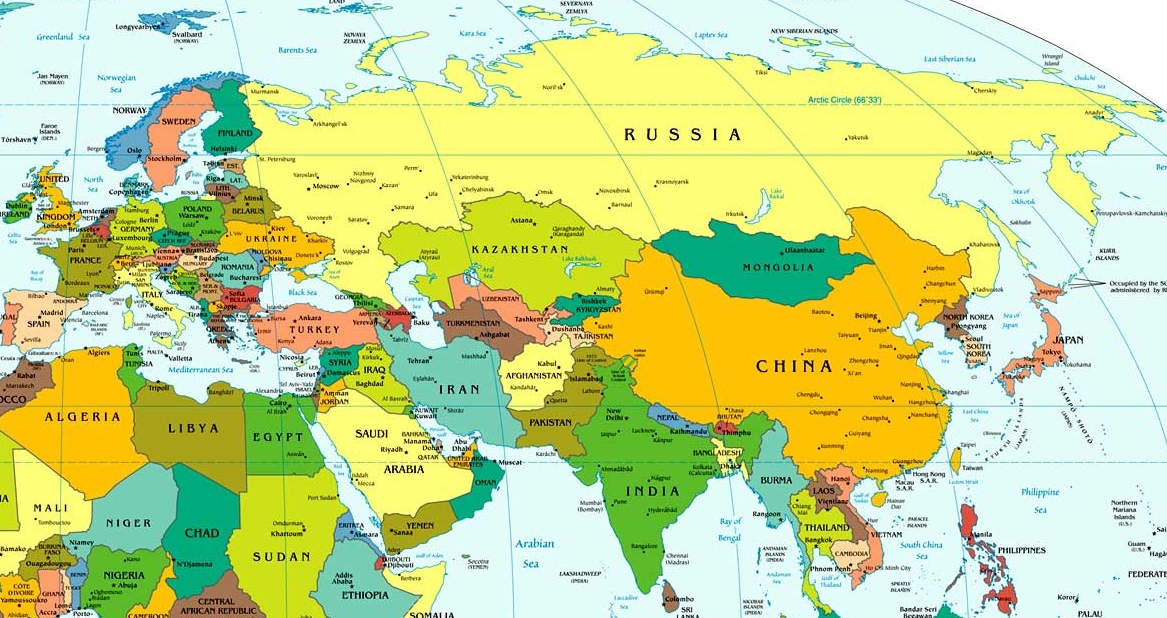

In [60]:
#request pic from url
urllib.request.urlretrieve("https://thestateofthecentury.files.wordpress.com/2013/02/eurasia-map1.jpg", "gh.jpg")
#open image
i = Image.open("gh.jpg")
#show image
i

We know that these areas get many earthquakes. But now I want to determine if these areas get significant earthquakes. Therefore, I will be plotting these areas and their magnitude frequencies. 

To plot the areas, first I need to add a 'place' column to the noaa data set and put all locations into that column. Then I can pull each area and its information from the noaa data set. 

In [61]:
#make 'place' column equal to the first column in location data set (index 0)
noaa['Place']=location[0]

#pull out rows with certain areas
a = noaa[noaa["Place"] == "ITALY"]
b = noaa[noaa["Place"] == "GREECE"]
c = noaa[noaa["Place"] == "BALKANS NW"]
d = noaa[noaa["Place"] == "TURKEY"]
e = noaa[noaa["Place"] == "IRAN"]
f = noaa[noaa["Place"] == "AFGHANISTAN"]
g = noaa[noaa["Place"] == "PAKISTAN"]
h = noaa[noaa["Place"] == "INDIA"]

<ipython-input-61-cf264d38339d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa['Place']=location[0]


In [62]:
#count magnitude frequency for all areas I just pulled out
chart1=(a['Magnitude'].value_counts())
chart2=(b['Magnitude'].value_counts())
chart3=(c['Magnitude'].value_counts())
chart4=(d['Magnitude'].value_counts())
chart5=(e['Magnitude'].value_counts())
chart6=(f['Magnitude'].value_counts())
chart7=(g['Magnitude'].value_counts())
chart8=(h['Magnitude'].value_counts())

<IPython.core.display.Javascript object>


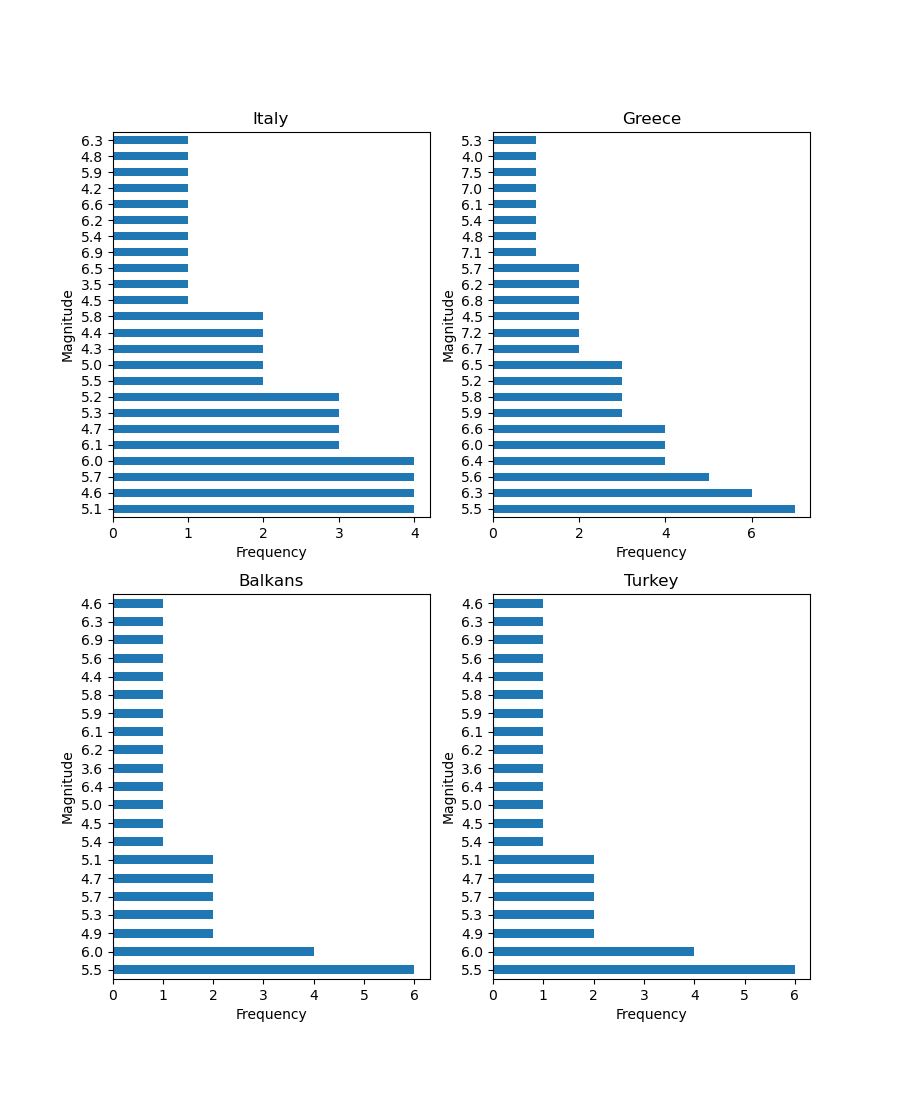

Text(0, 0.5, 'Magnitude')

In [63]:
#give plot a figure and size
fig=plt.figure(figsize=(9,11))
#create subplot
plt.subplot(221)
#plot, label
chart1.plot.barh(title='Italy')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
#and so on
plt.subplot(222)
chart2.plot.barh(title='Greece')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.subplot(223)
chart3.plot.barh(title='Balkans')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.subplot(224)
chart3.plot.barh(title='Turkey')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

Chart 1: Italy - not only does Italy have many earthquakes, but some of its most frequent earthquakes are of a 5.7 or 6.0 magnitude.

Chart 2: Greece - not only does Greece have many earthquakes, but some of its most frequent earthquakes are of a 5.5 magnitude or higher. 

Chart 3: Balkans - not only does the Balkan area have many earthquakes, but some of its most frequent earthquakes are of a 5.5 magnitude or higher.

Chart 4: Turkey - not only does Turkey have many earthquakes, but some of its most frequent earthquakes are of a 5.0 magnitude or higher.

According to Michigan Tech, at http://www.geo.mtu.edu/UPSeis/magnitude.html, earthquakes with magnitudes between 5.5 and 6.0 can cause some damage to buildings, while those between 6.1 and 6.9 can cause a lot of damage.

These four Eurpoean countries have frequent magnitudes of 5.5 to 6.9 (in addition to smaller ones as well). The earthquakes may not be as large as those that occur in the 'Ring of Fire' countries, but they are still more intense than others that take place around the world.

<ipython-input-64-d646d07d3a5c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(9,11))


<IPython.core.display.Javascript object>


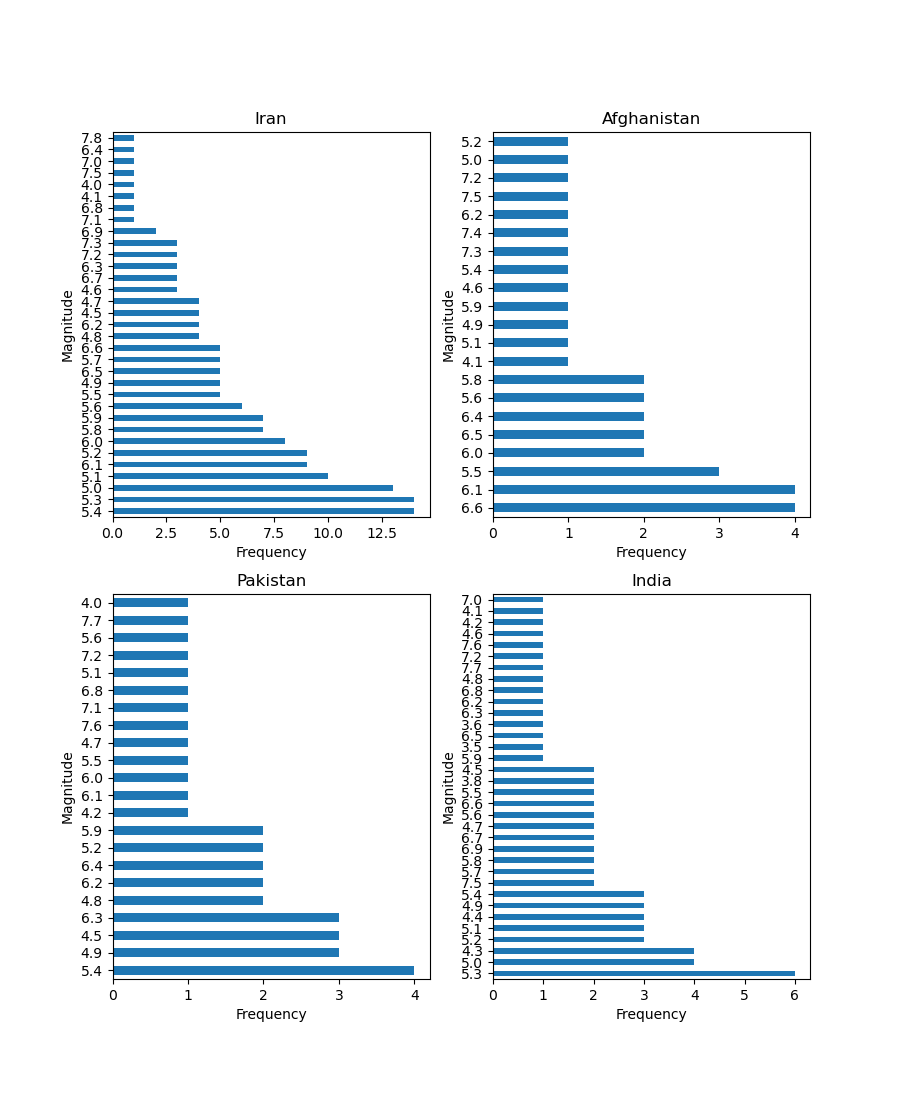

Text(0, 0.5, 'Magnitude')

In [64]:
#plot next 4 areas
fig=plt.figure(figsize=(9,11))
plt.subplot(221)
chart5.plot.barh(title='Iran')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.subplot(222)
chart6.plot.barh(title='Afghanistan')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.subplot(223)
chart7.plot.barh(title='Pakistan')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.subplot(224)
chart8.plot.barh(title='India')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


Chart 5: Iran - Iran is interesting because it's most frequent magnitudes are 5.4 or lower. However, all the other tables have 'frequency' axes that go to just 4 or 6. Iran, by comparison, has a 'frequency' axis that goes past 12.5. This means that when looking at Iran's less frequent but larger magnitudes, those magnitudes still occur just as much for Iran as for the other countries I am analyzing.

Chart 6: Afghanistan - not only does Afghanistan have many earthquakes, but its most frequent earthquakes are of a 5.5 magnitude or higher. 

Chart 7: Pakistan - Pakistan has many earthquakes, but its most frequent earthquakes do have a lower magnitude. Among its most frequent ones are magnitudes within the 4.0 range. 

Chart 8: India - Similar to Pakistan, India's most frequent earthquakes are lower in magnitude. They range from a 4.3 to a 5.3.

Iran and Afghanistan have frequent and significant earthquakes. Pakistan and India have the occasional large earthquake, although they do have regular earthquakes more frequently than other places in the world. 

### Answer To Question 1:

In summary, my first research question was: Is/are there other area(s) around the globe that receive the most significant and/or frequent earthquakes, outside the “Ring of Fire?".

To this question, according to my analysis work, I can answer: yes. One such place is the areas of land that hug the top center and top right of the Meditteranean Sea (the four European countries) & land between the Middle East and China (Iran, Afghanistan, Pakistan, and India).

In fact, after coming to this conclusion, I did a Google search to see if any scientist had maybe spoken about these areas in connection to moving tectonic plates and earthquakes that arise from those movements. Sure enough, after digging through USGS's information on earthquakes, I came across the following (which I cannot believe I did not discover in my initial research for the project proposal): 

"The Alpide earthquake belt extends from Sumatra through the Himalayas, the Mediterranean, and out into the Atlantic. This belt accounts for about 17 percent of the world's largest earthquakes."
(https://www.usgs.gov/faqs/where-do-earthquakes-occur?qt-news_science_products=0#qt-news_science_products)

A picture of the Alpide belt is as follows:

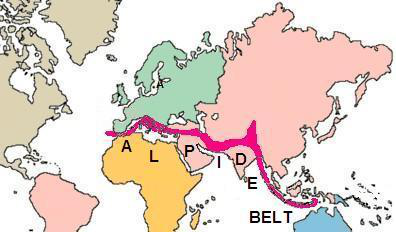

In [65]:
#request pic from url
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/map-bms/b/b8/Alpide_Belt.jpg", "ab.jpg")
#open image
ab = Image.open("ab.jpg")
#show image
ab

The Alpide belt runs right through Italy, the Balkan region, Greece, Turkey, Pakistan, Afghanistan, and the skims along the top on India. It comes to an end near Indonesia, where it meets up with the other earthquake belt (the 'Ring of Fire').

### Question 2: 

How often did a tsunami accompany an earthquake? Is there perhaps a connection between earthquake magnitude/frequency and an ensuing tsunami? 

First, let's look at our 'tsunami - to - not -tsunami' ratio again:

In [66]:
#tsunami 'yes's out of noaa rows
578/len(noaa)

0.2389417114510128

However, this 23.89% is a ratio of tsunami occurences for all locations in the data set, which includes land locked countries. Land locked countries can have many earthquakes and not a single tsunami, as shown by Afghanistan. Afghanistan has many earthquakes but is never accompanied by an earthquake in our data set:

In [67]:
#pull all rows from noaa that have a 'Yes' for Tsunami value
tsun_df = noaa[noaa["Tsunami"] == "Yes"]

#group by place, count values, display the first 6 (those that begin with an 'A')
tsun_df.groupby('Place').count().head(6)

Year  Tsunami  Name  Magnitude  Deaths  \
Place                                                                         
ALASKA                                 28       28    28         28       1   
ALGERIA                                 4        4     4          4       4   
ANATAHAN REGION, N. MARIANA ISLANDS     1        1     1          1       0   
ATLANTIC OCEAN                          2        2     2          2       0   
AUSTRALIA                               2        2     2          2       0   
AZORES                                  1        1     1          1       1   

                                     Injuries  Damage $Mill  
Place                                                        
ALASKA                                      0             1  
ALGERIA                                     4             3  
ANATAHAN REGION, N. MARIANA ISLANDS         0             0  
ATLANTIC OCEAN                              0             0  
AUSTRALIA                                   0             0  
AZORES                                      1             1

(I reviewed the whole tsun_df set and determined that every location listed there borders a sizable body of water in some way or another (whether it is an ocean, sea, or gulf)).

Let's look at all the grouped tsunami information and see what conclusions, if any, can be drawn from it:

In [68]:
#group tsunami df by place, count value frequency, sort by tsunami frequency
tsun_df.groupby('Place').count().sort_values(by='Tsunami')

Year  Tsunami  Name  Magnitude  Deaths  Injuries  \
Place                                                                  
JORDAN                 1        1     1          1       0         1   
INDIAN OCEAN           1        1     1          1       0         0   
INDONESIA-MALAYSIA     1        1     1          1       1         0   
IRAN                   1        1     1          1       1         1   
IWATE, JAPAN           1        1     1          1       0         0   
...                  ...      ...   ...        ...     ...       ...   
SOLOMON ISLANDS       31       31    31         31       4         1   
CHILE                 40       40    40         40      14        10   
RUSSIA                52       52    52         51       3         4   
INDONESIA             54       54    54         53      25        24   
JAPAN                 91       91    91         83      21        34   

                    Damage $Mill  
Place                             
JORDAN                         0  
INDIAN OCEAN                   0  
INDONESIA-MALAYSIA             0  
IRAN                           1  
IWATE, JAPAN                   0  
...                          ...  
SOLOMON ISLANDS                0  
CHILE                          9  
RUSSIA                         1  
INDONESIA                     11  
JAPAN                         11  

[86 rows x 7 columns]

Most places with 10 tsunamis or above intersect the 'Ring of Fire'. Japan has the most at 91 tsunamis. 

Italy, Greece, the Balkans, Turkey, Iran, Pakistan, and India are all included in this tsunami list. While most of these seven areas have only a tsunami frequency of 1 or 2, Turkey and Greece have tsunami frequencies of 5 and 18 respectively. 


### Answer To Question 2:

The 'Ring of Fire' places had the most tsunamis, so my hypothesis is that there is a connection between earthquake frequencies/magnitudes within the 'Ring of Fire' and ensuing tsunamis. However, my hypothesis runs into a problem when looking at certain areas. An example is China. China is on the 'Ring of Fire' and has a significant number of earthquakes, but it only has two tsunamis. I can think of several reasons this might be the case, but I would need more variables and data to analyze to fully develop what I'm thinking. 

A hypothesis becomes even less likely when looking at the Alpine belt. The areas that intersect with this belt receive plenty of significant earthquakes. However, their tsunami frequencies are all over the place. For example, Greece has 18 tsunamis, but Italy, which is geographically close to Greece, has only 3. There must be other variables at play here, ones unrelated to a region's earthquake propensity. 

## Conclusion:

After 'Ring of Fire', the Alpide belt is the largest earthquake hotspot on Earth. The belt extends from the Mediterranean region, eastward through Turkey, part of the Middle East, and northern India. 15-17% of the world's largest earthquakes will happen here. This area will also see more earthquakes than other areas around the world. 

This result was concluded by analyzing the NOAA database of earthquakes from the years of 1960 to 2020, and finding that all the relevant regions did have frequent and significant earthquakes. Scientists, governments, and humanitarian aid organizations should consider focusing some of their resources in these areas (if they have not already done so), considering these areas will experience destructive natural disasters. 

A strong connection between the tsunami and earthquake variables was not able to be made. However, we do have the start of a hypothesis that can be analyzed further with more data sets, research, and time. 